In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
from google.colab import files
uploaded = files.upload()
customers = pd.read_csv('Customers.csv')
transactions = pd.read_csv('Transactions.csv')

Saving Customers.csv to Customers (1).csv
Saving Transactions.csv to Transactions (1).csv


In [4]:
merged_data = transactions.merge(customers, on='CustomerID')
print(merged_data.head())

  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3        T00272      C0087      P067  2024-03-26 22:55:37         2   
4        T00363      C0070      P067  2024-03-21 15:10:10         3   

   TotalValue   Price     CustomerName         Region  SignupDate  
0      300.68  300.68   Andrea Jenkins         Europe  2022-12-03  
1      300.68  300.68  Brittany Harvey           Asia  2024-09-04  
2      300.68  300.68  Kathryn Stevens         Europe  2024-04-04  
3      601.36  300.68  Travis Campbell  South America  2024-04-11  
4      902.04  300.68    Timothy Perez         Europe  2022-03-15  


In [5]:
customer_features = merged_data.groupby('CustomerID').agg({
    'TotalValue': 'sum',
    'TransactionID': 'count',
    'Price': 'mean'
}).rename(columns={
    'TotalValue': 'Total_Spent',
    'TransactionID': 'Transaction_Count',
    'Price': 'Avg_Price'
})
customer_features = customer_features.merge(
    customers[['CustomerID', 'Region']], on='CustomerID'
)
print(customer_features.head())

  CustomerID  Total_Spent  Transaction_Count   Avg_Price         Region
0      C0001      3354.52                  5  278.334000  South America
1      C0002      1862.74                  4  208.920000           Asia
2      C0003      2725.38                  4  195.707500  South America
3      C0004      5354.88                  8  240.636250  South America
4      C0005      2034.24                  3  291.603333           Asia


In [6]:
customer_features = pd.get_dummies(customer_features, columns=['Region'], drop_first=True)
print(customer_features.head())

  CustomerID  Total_Spent  Transaction_Count   Avg_Price  Region_Europe  \
0      C0001      3354.52                  5  278.334000          False   
1      C0002      1862.74                  4  208.920000          False   
2      C0003      2725.38                  4  195.707500          False   
3      C0004      5354.88                  8  240.636250          False   
4      C0005      2034.24                  3  291.603333          False   

   Region_North America  Region_South America  
0                 False                  True  
1                 False                 False  
2                 False                  True  
3                 False                  True  
4                 False                 False  


In [7]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(customer_features.drop('CustomerID', axis=1))

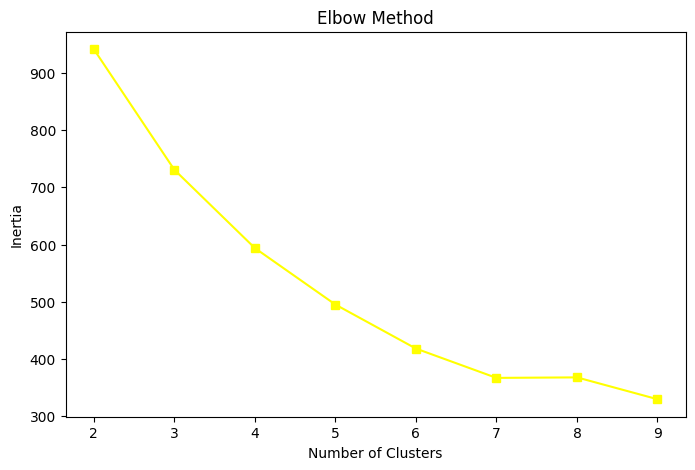

In [10]:
inertia = []
k_values = range(2, 10)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, marker='s', color='yellow')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()


In [11]:
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(scaled_features)
customer_features['Cluster'] = clusters

In [12]:
db_index = davies_bouldin_score(scaled_features, clusters)
print(f"Davies-Bouldin Index: {db_index}")

Davies-Bouldin Index: 1.290983529547829


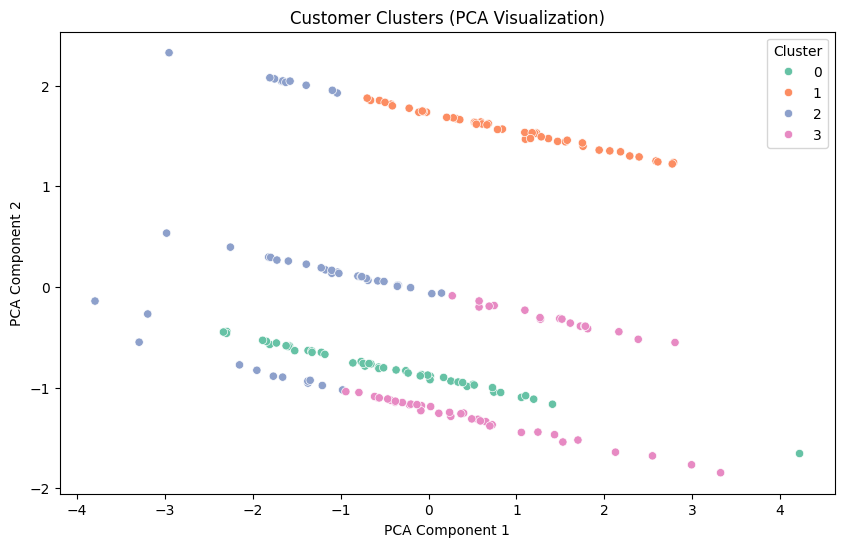

In [13]:
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(scaled_features)
visualization_df = pd.DataFrame(reduced_features, columns=['PCA1', 'PCA2'])
visualization_df['Cluster'] = clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='PCA1', y='PCA2', hue='Cluster', data=visualization_df, palette='Set2'
)
plt.title('Customer Clusters (PCA Visualization)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

In [14]:
customer_features[['CustomerID', 'Cluster']].to_csv('Raghav_E_Clustering.csv', index=False)
print("Clustering results saved to Raghav_E_Clustering.csv")

Clustering results saved to Raghav_E_Clustering.csv
